In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns=None

In [45]:
data=pd.read_csv("HousePrice.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

<h1>EDA</h1>
<h5>Missing Values</h5>

In [46]:
missingfeatures=[i for i in data.columns if data[i].isnull().sum()>0]
missingfeatures

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [47]:
for i in missingfeatures:
    print(i," - ",np.round(data[i].isnull().mean()*100,2))

LotFrontage  -  17.74
Alley  -  93.77
MasVnrType  -  0.55
MasVnrArea  -  0.55
BsmtQual  -  2.53
BsmtCond  -  2.53
BsmtExposure  -  2.6
BsmtFinType1  -  2.53
BsmtFinType2  -  2.6
Electrical  -  0.07
FireplaceQu  -  47.26
GarageType  -  5.55
GarageYrBlt  -  5.55
GarageFinish  -  5.55
GarageQual  -  5.55
GarageCond  -  5.55
PoolQC  -  99.52
Fence  -  80.75
MiscFeature  -  96.3


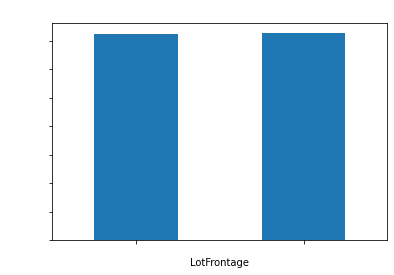

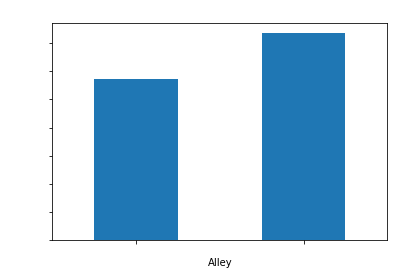

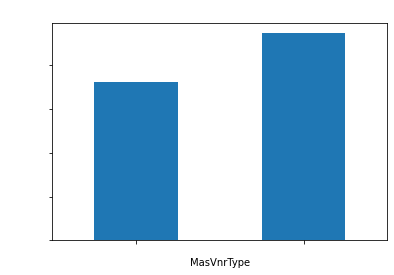

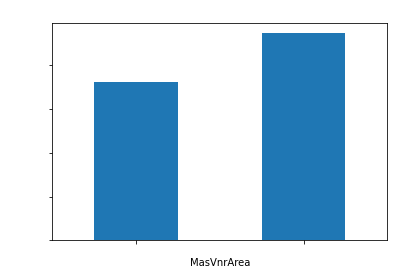

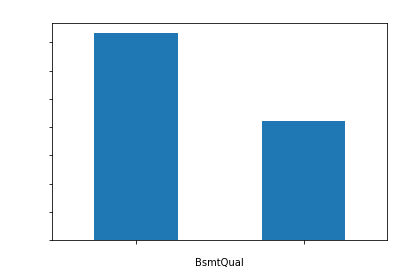

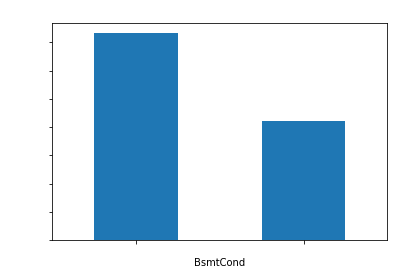

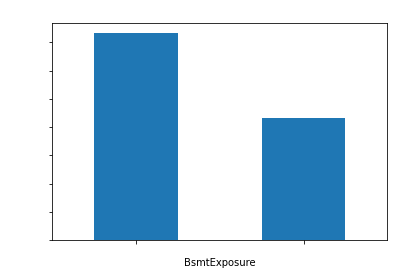

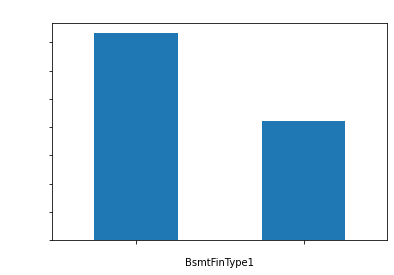

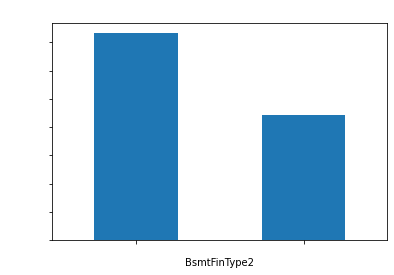

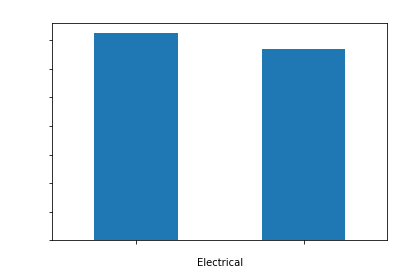

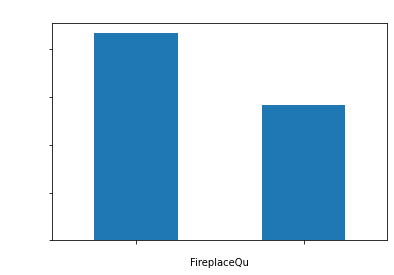

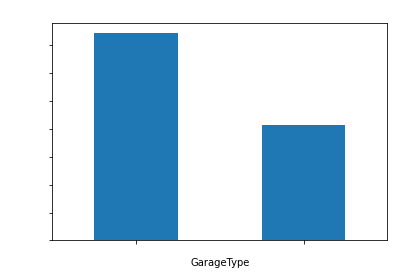

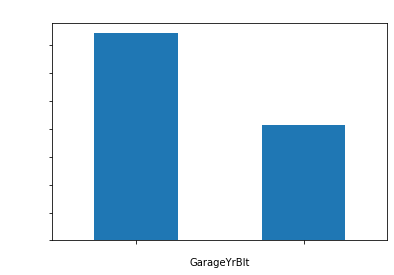

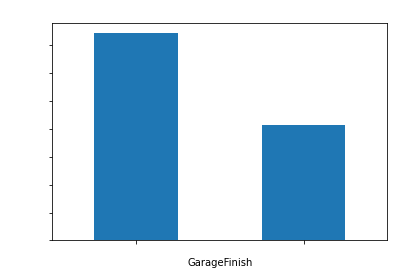

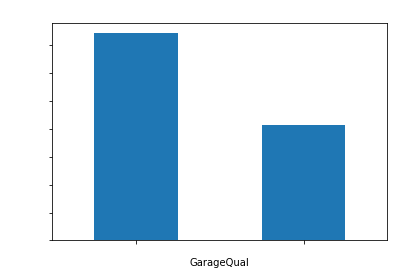

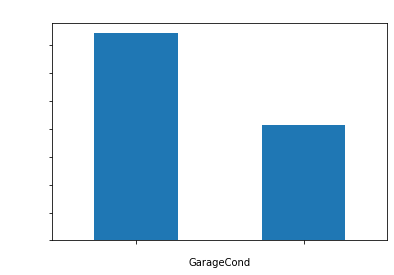

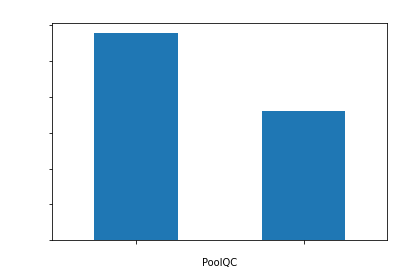

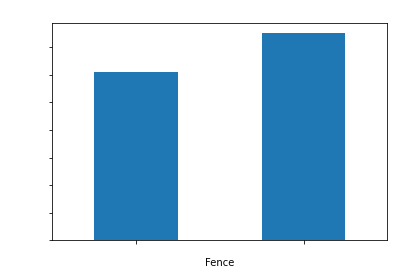

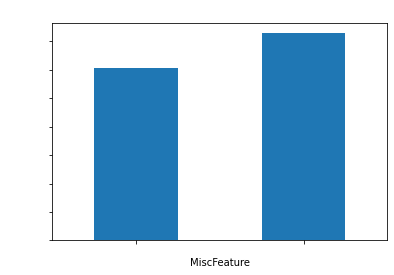

In [48]:
for i in missingfeatures:
    df=data.copy()
    df[i]=np.where(df[i].isnull(),1,0)
    df.groupby(i)['SalePrice'].mean().plot.bar()
    plt.title(i,color='w')
    plt.xticks(color='w')
    plt.yticks(color='w')
    
    plt.show()

<h5>Numerical Data</h5>

In [49]:
NumericalFeatures=[i for i in data.columns if data[i].dtype!='O']
data[NumericalFeatures]
print(len(NumericalFeatures))

38


<h5>Temporal Variables</h5>

In [50]:
TemporalFeatures=[i for i in data.columns if 'Yr' in i or 'Year' in i]
TemporalFeatures

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

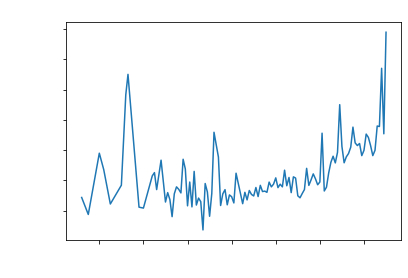

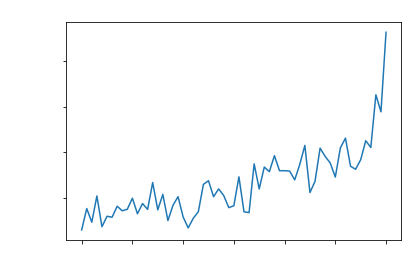

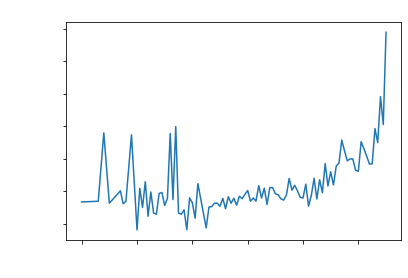

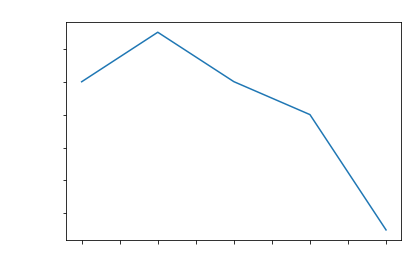

In [75]:
for i in TemporalFeatures:
    df=data.copy()
    df.groupby(i)['SalePrice'].median().plot()
    plt.xlabel(i,color='w')
    plt.ylabel("Year Sold",color='w')
    plt.title(f'Sale Price vs {i}',color='w')
    plt.xticks(color='w')
    plt.yticks(color='w')
    plt.show()

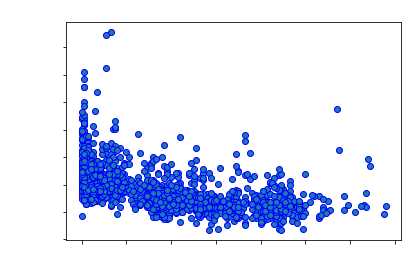

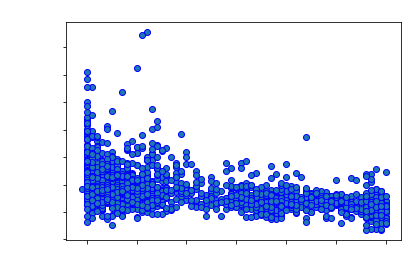

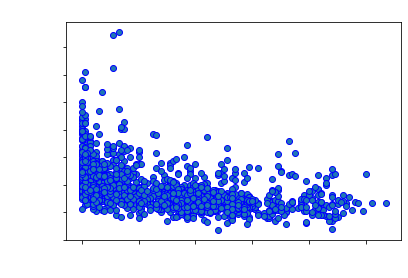

In [52]:
for i in TemporalFeatures:
    if i!='YrSold':
        df=data.copy()
        df[i]=df['YrSold']-df[i]
        plt.scatter(df[i],df['SalePrice'],edgecolors='b')
        plt.xlabel(i,color='w')
        plt.ylabel("YrSold",color='w')
        plt.title(f'Sale Price vs {i}',color='w')
        plt.xticks(color='w')
        plt.yticks(color='w')
        plt.show()

<h4>Discrete Features</h4>

In [58]:
DiscreteFeatures=[i for i in data.columns if data[i].nunique()<11 and i not in TemporalFeatures+['Id']]
DiscreteFeatures
data[DiscreteFeatures]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolArea,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,Typ,0,NaN,Attchd,RFn,2,TA,TA,Y,0,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,0,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,0,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,0,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,0,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,6,5,Gable,CompShg,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,0,0,2,1,3,1,TA,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,0,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,6,6,Gable,CompShg,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,1,0,2,0,3,1,TA,Min1,2,TA,Attchd,Unf,2,TA,TA,Y,0,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,9,Gable,CompShg,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,0,0,2,0,4,1,Gd,Typ,2,Gd,Attchd,RFn,1,TA,TA,Y,0,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,6,Hip,CompShg,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,1,0,1,0,2,1,Gd,Typ,0,NaN,Attchd,Unf,1,TA,TA,Y,0,NaN,NaN,NaN,WD,Normal


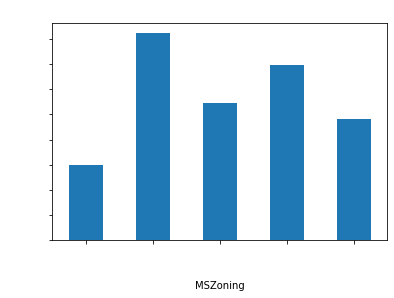

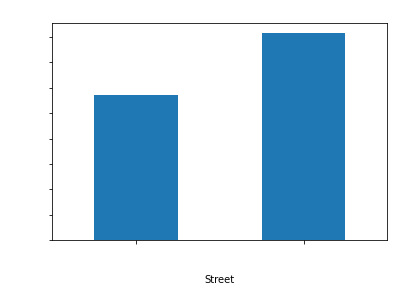

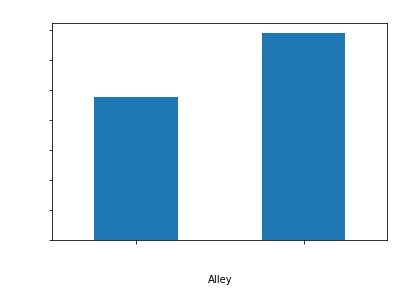

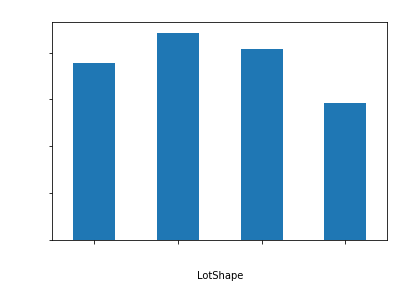

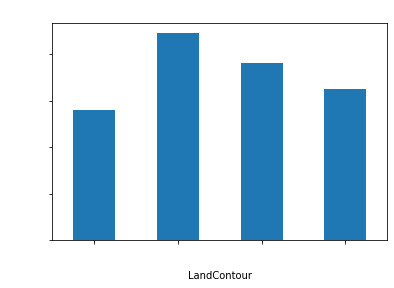

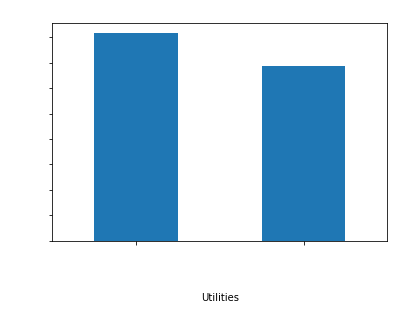

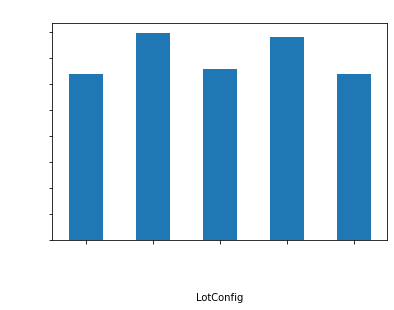

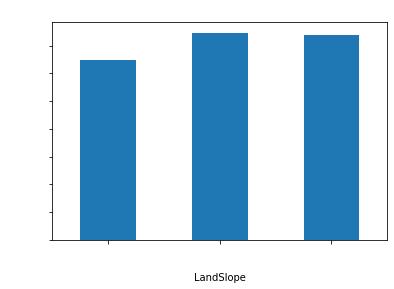

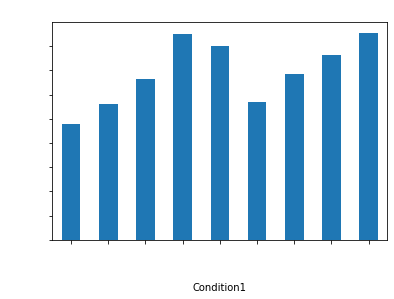

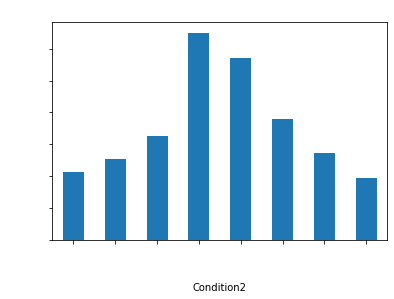

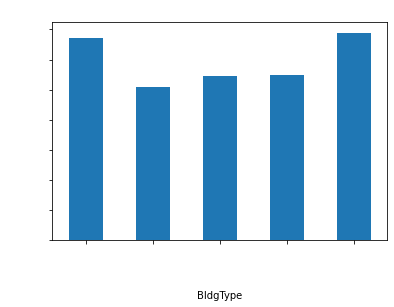

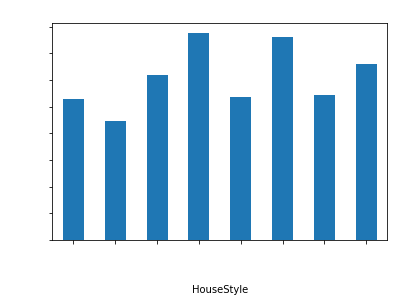

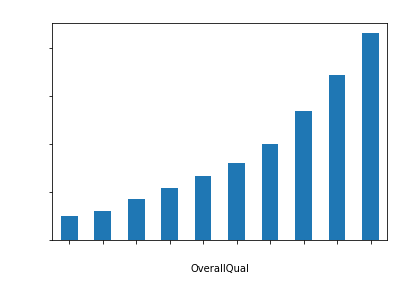

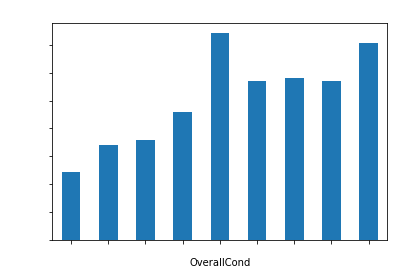

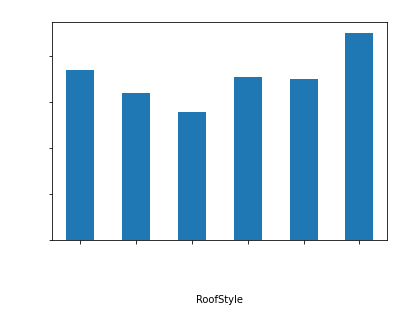

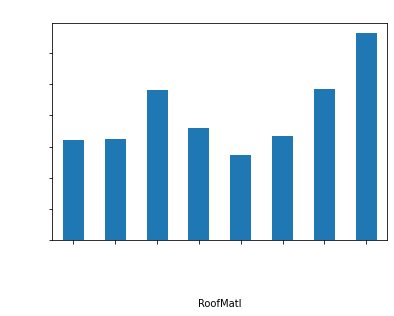

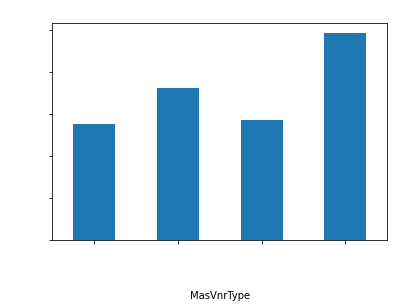

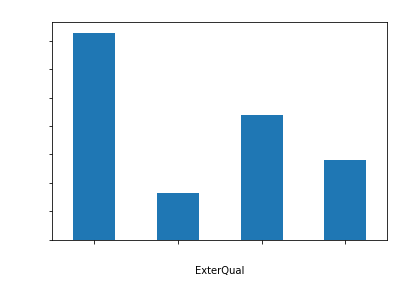

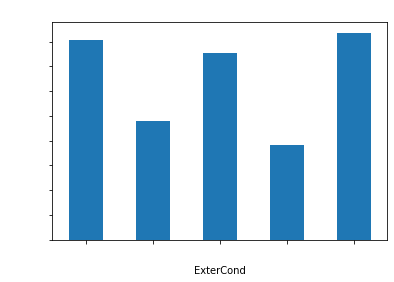

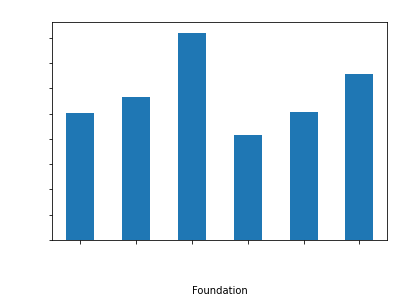

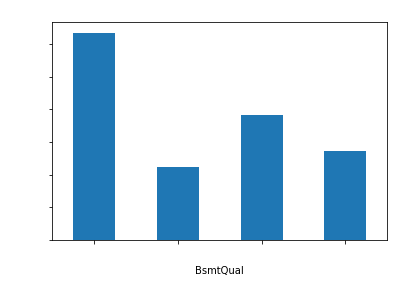

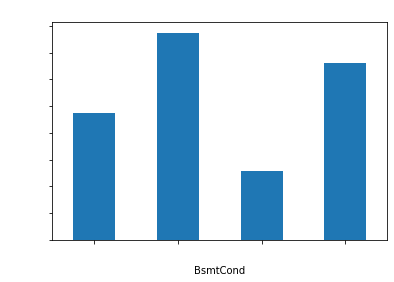

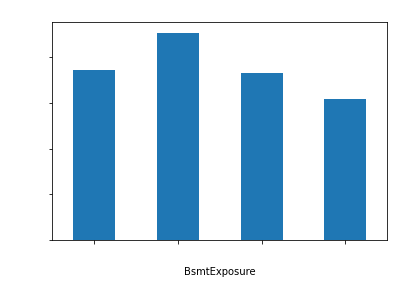

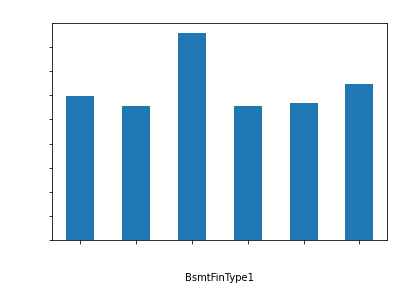

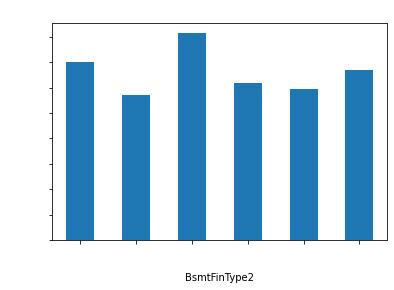

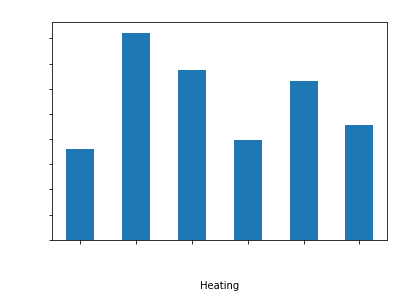

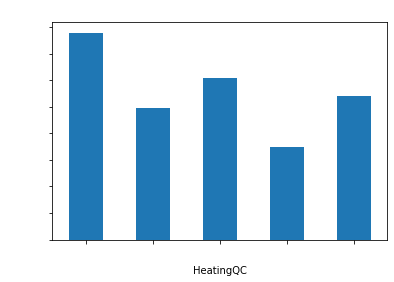

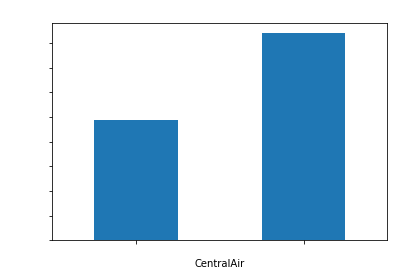

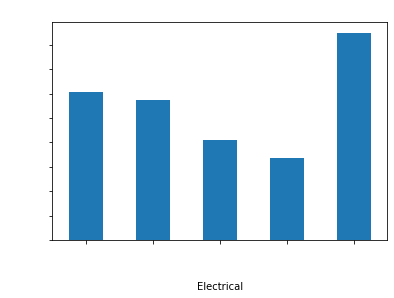

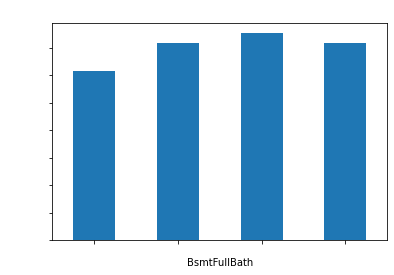

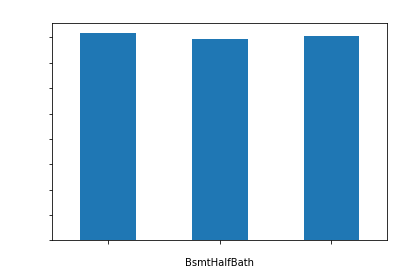

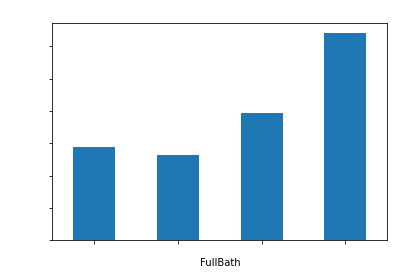

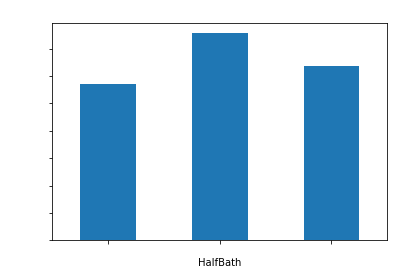

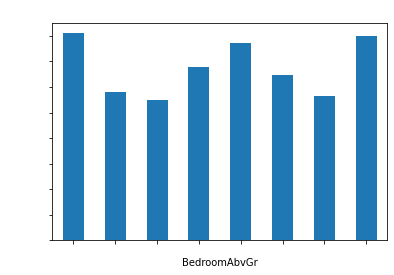

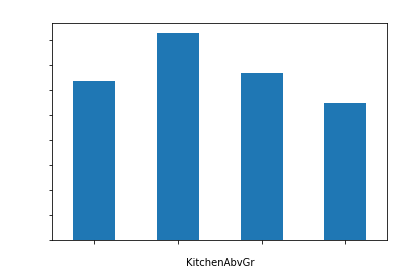

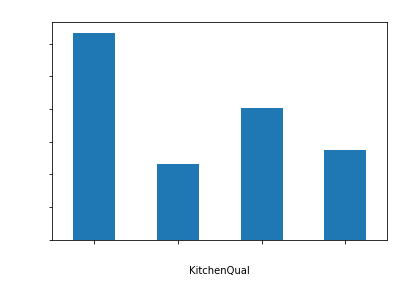

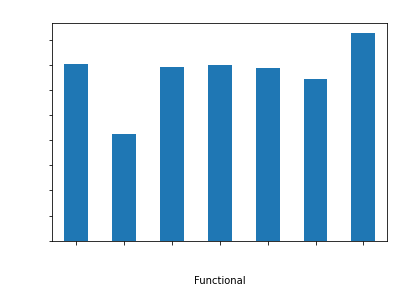

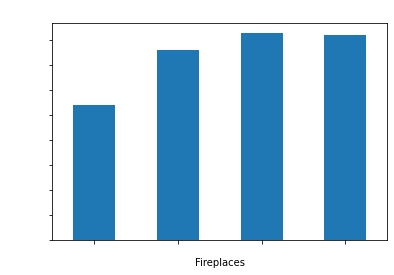

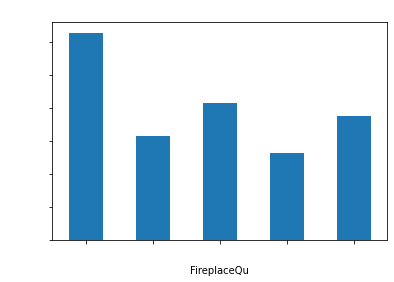

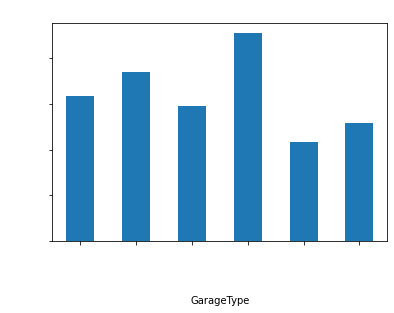

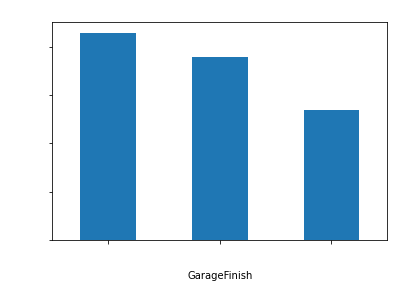

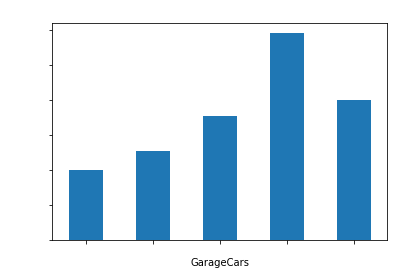

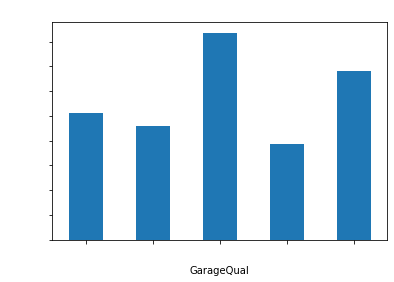

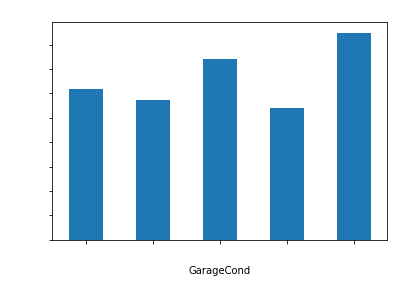

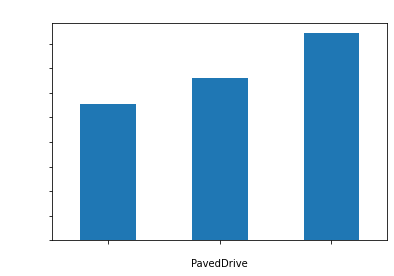

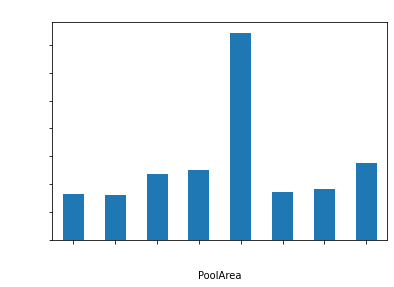

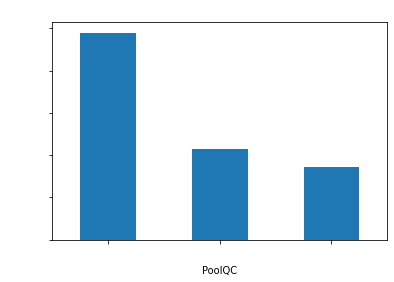

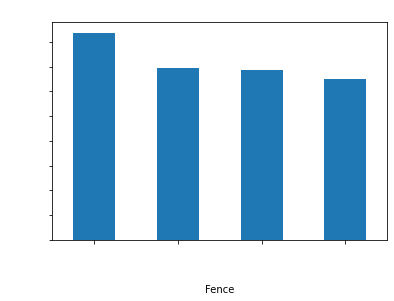

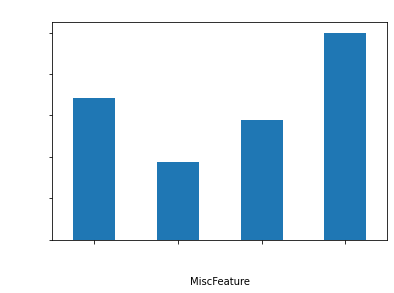

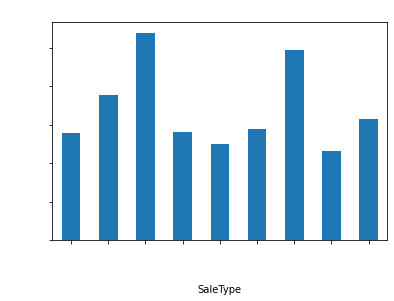

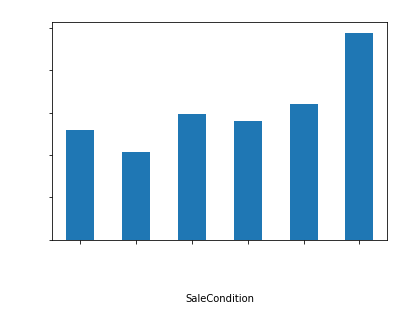

In [59]:
for i in DiscreteFeatures:
    df=data.copy()
    df.groupby(i)['SalePrice'].median().plot.bar()
    plt.title(f'Sale Price vs {i}',color='w')
    plt.xticks(color='w')
    plt.yticks(color='w')
    plt.show()

<h3>Continuous Features</h5>

In [ ]:
#They are those columns which are not dicrete and have some numerical values on which the outcome can depends

In [61]:
ContinuousFeatures=[i for i in NumericalFeatures if i not in TemporalFeatures+DiscreteFeatures+['Id']]
data[ContinuousFeatures]

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,SalePrice
0,60,65.0,8450,196.0,706,0,150,856,856,854,0,1710,8,548,0,61,0,0,0,0,2,208500
1,20,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,6,460,298,0,0,0,0,0,5,181500
2,60,68.0,11250,162.0,486,0,434,920,920,866,0,1786,6,608,0,42,0,0,0,0,9,223500
3,70,60.0,9550,0.0,216,0,540,756,961,756,0,1717,7,642,0,35,272,0,0,0,2,140000
4,60,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,9,836,192,84,0,0,0,0,12,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,0.0,0,0,953,953,953,694,0,1647,7,460,0,40,0,0,0,0,8,175000
1456,20,85.0,13175,119.0,790,163,589,1542,2073,0,0,2073,7,500,349,0,0,0,0,0,2,210000
1457,70,66.0,9042,0.0,275,0,877,1152,1188,1152,0,2340,9,252,0,60,0,0,0,2500,5,266500
1458,20,68.0,9717,0.0,49,1029,0,1078,1078,0,0,1078,5,240,366,0,112,0,0,0,4,142125


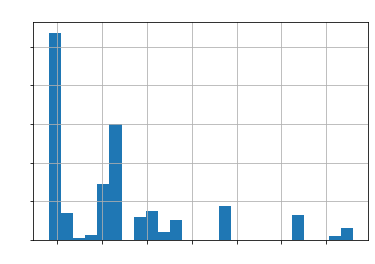

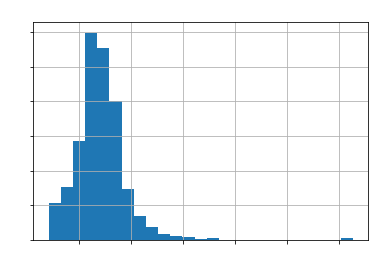

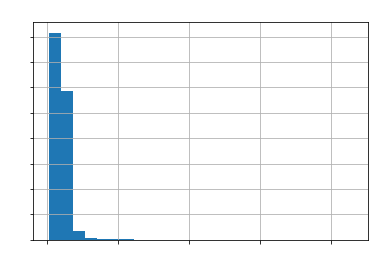

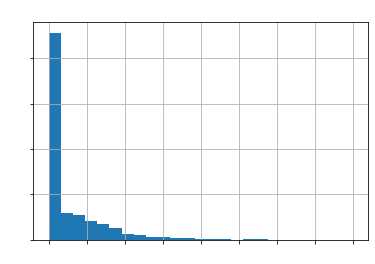

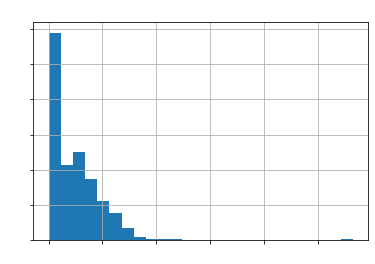

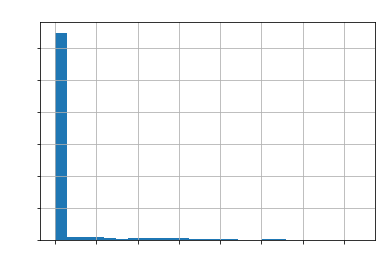

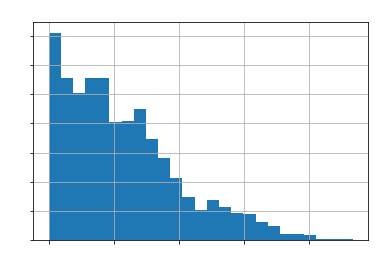

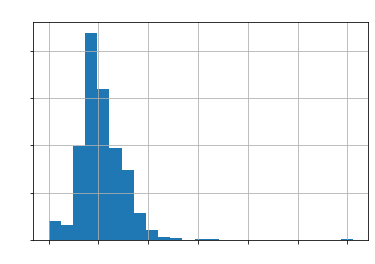

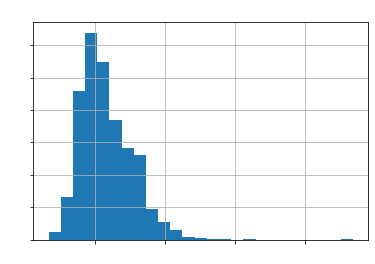

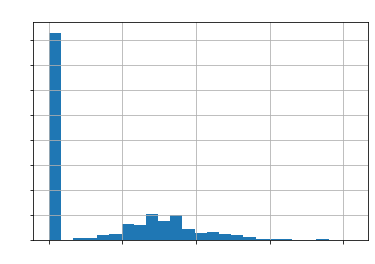

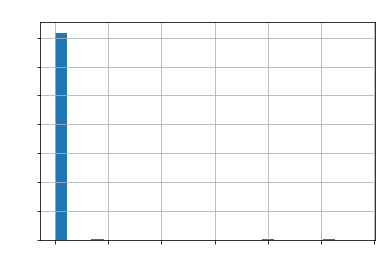

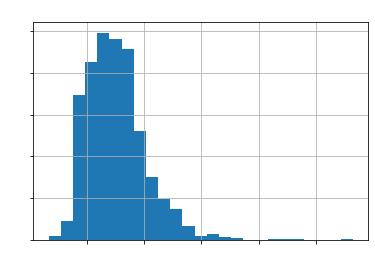

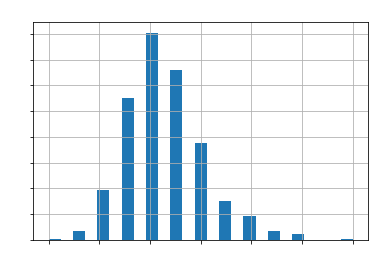

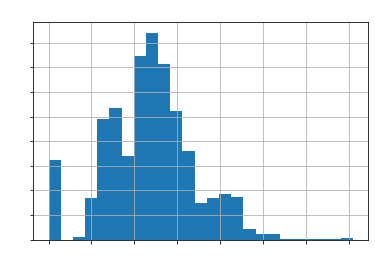

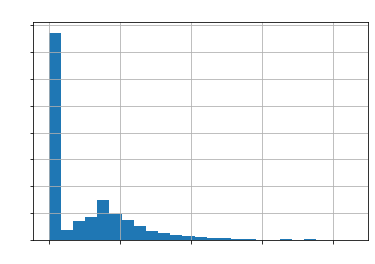

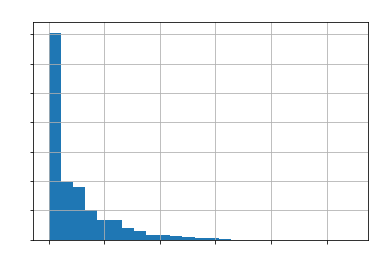

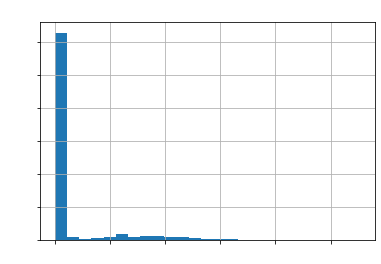

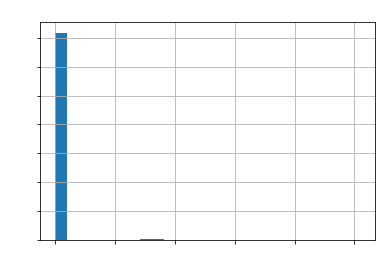

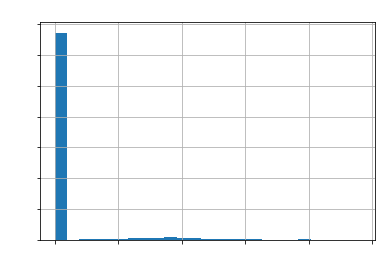

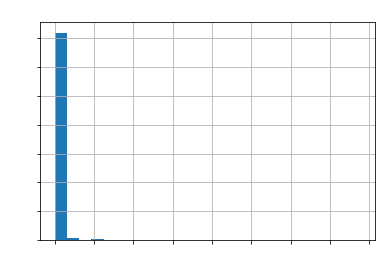

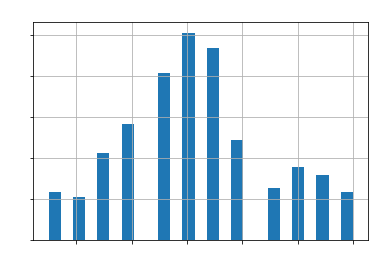

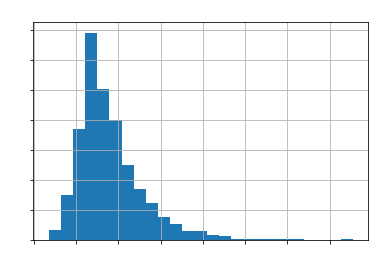

In [63]:
for i in ContinuousFeatures:
    df=data.copy()
    df[i].hist(bins=25)
    plt.title(f'Sale Price vs {i}',color='w')
    plt.xticks(color='w')
    plt.yticks(color='w')
    plt.show()
    

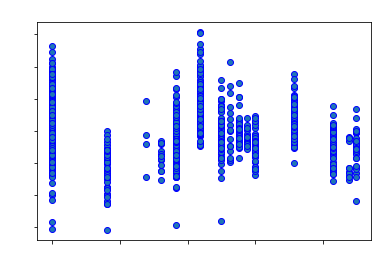

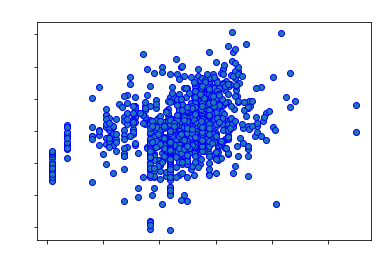

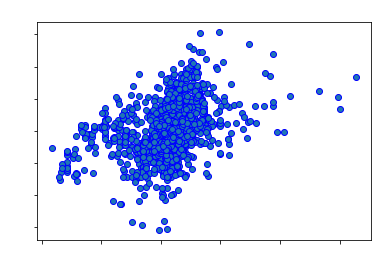

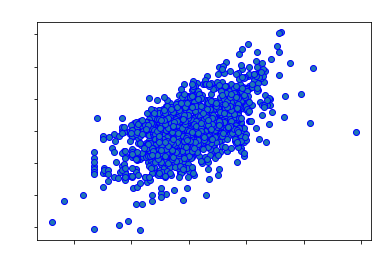

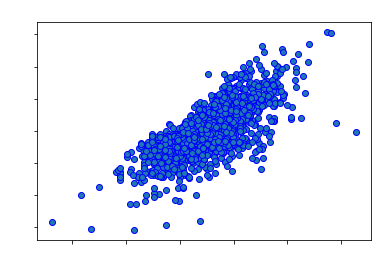

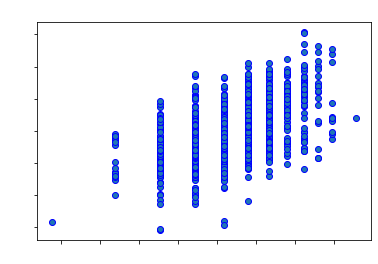

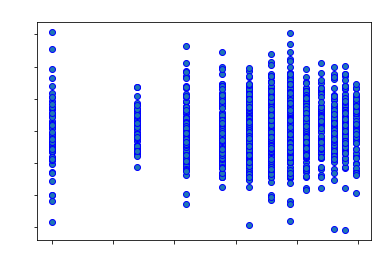

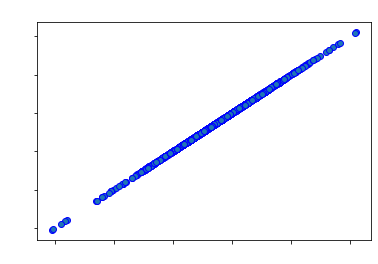

In [66]:
#Logarithmic transformation of continuous features
for i in ContinuousFeatures:
    df=data.copy()
    if 0 in data[i].unique():
        pass
    else:
        df[i]=np.log(df[i])
        df['SalePrice']=np.log(df['SalePrice'])
        plt.scatter(df[i],df['SalePrice'],edgecolors='b')
        plt.title(f'Sale Price vs {i}',color='w')
        plt.xticks(color='w')
        plt.yticks(color='w')
        plt.show()        

<h4>Outliers</h4>

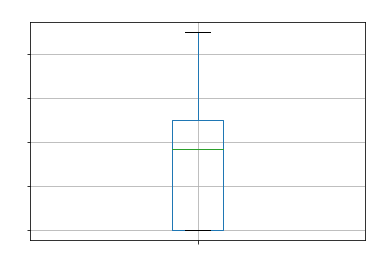

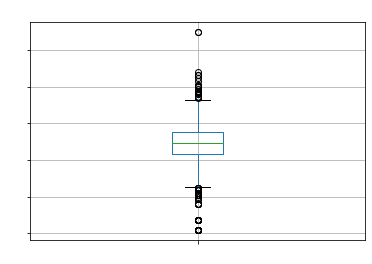

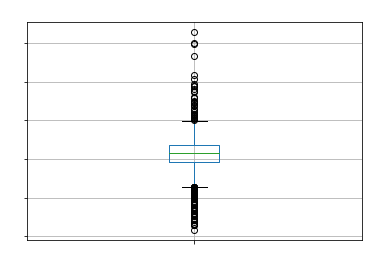

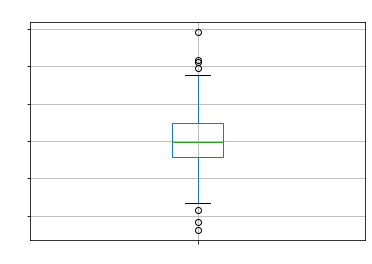

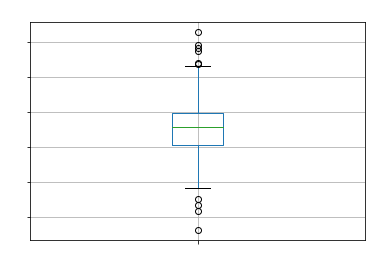

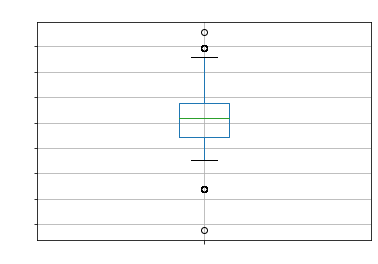

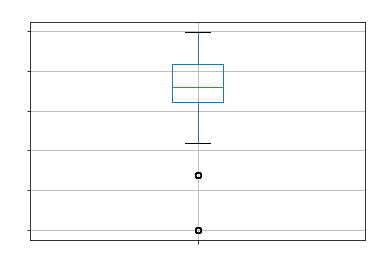

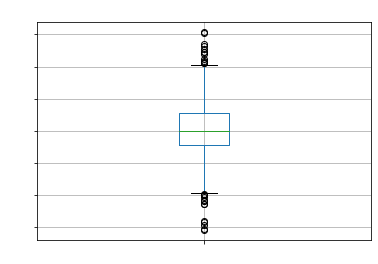

In [68]:
for i in ContinuousFeatures:
    df=data.copy()
    if 0 in data[i].unique():
        pass
    else:
        df[i]=np.log(df[i])
        df.boxplot(column=i)
        plt.title(f'Sale Price vs {i}',color='w')
        plt.xticks(color='w')
        plt.yticks(color='w')
        plt.show()

<h4> Categorical Features</h4>

In [70]:
CategoricalFeatures=[i for i in data.columns if data[i].dtype=='O']
CategoricalFeatures

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

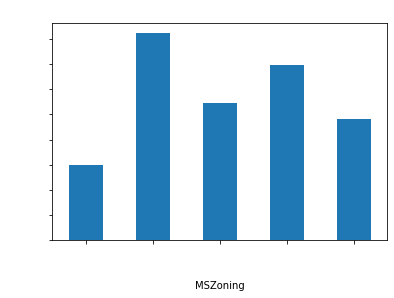

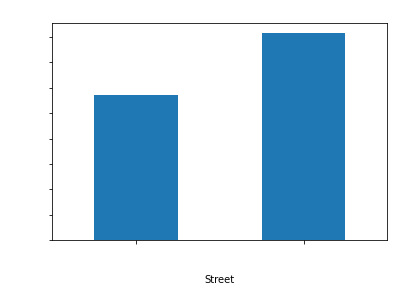

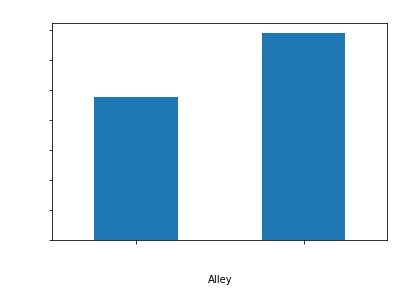

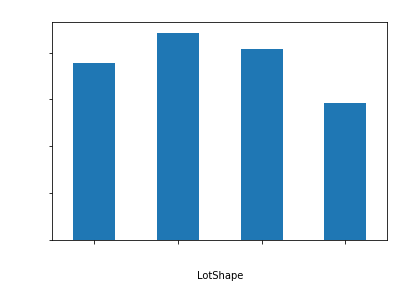

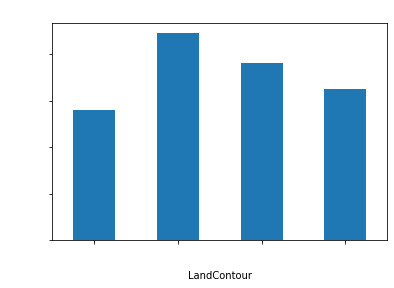

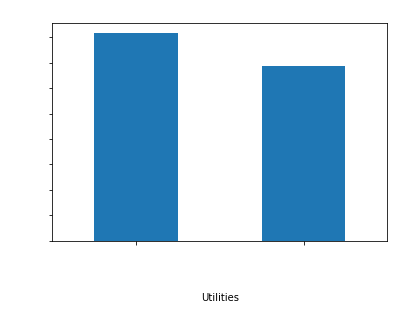

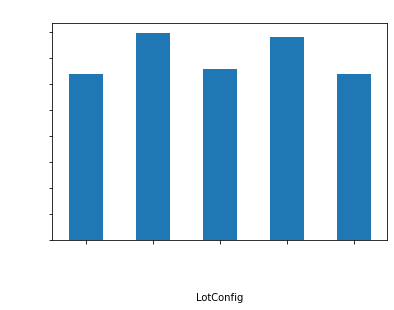

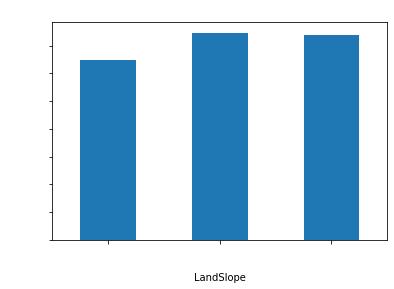

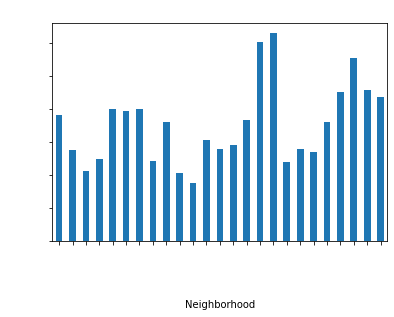

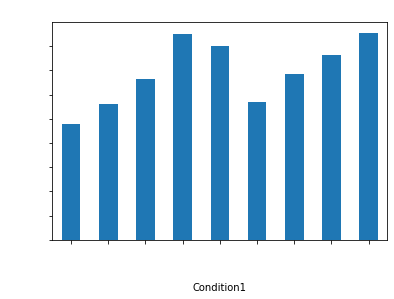

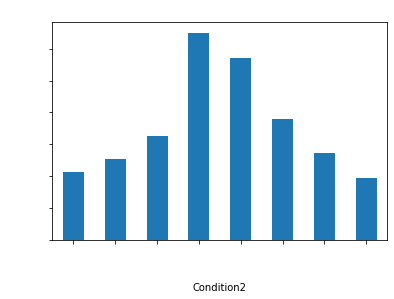

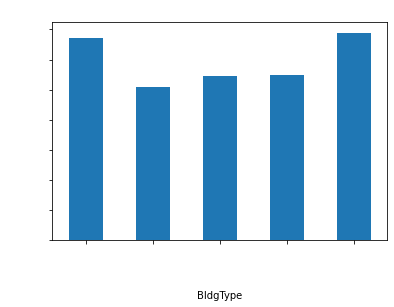

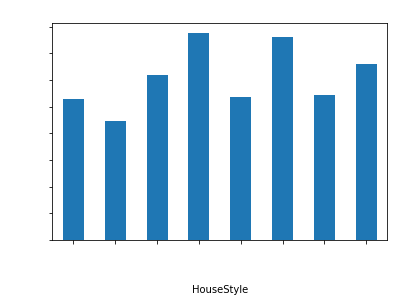

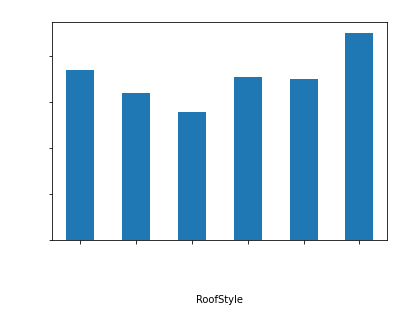

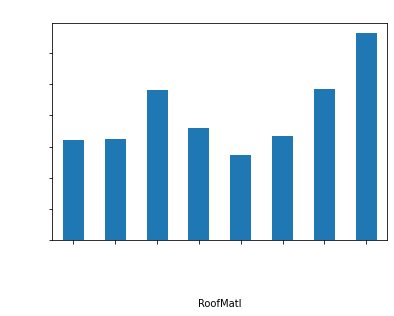

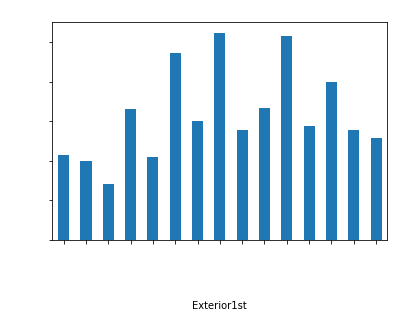

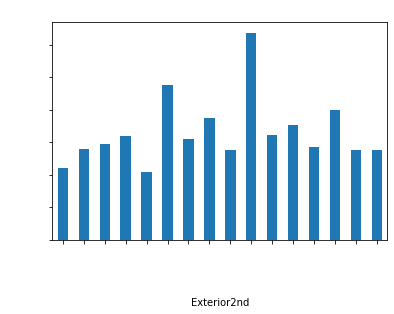

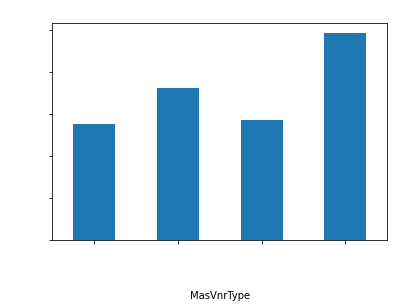

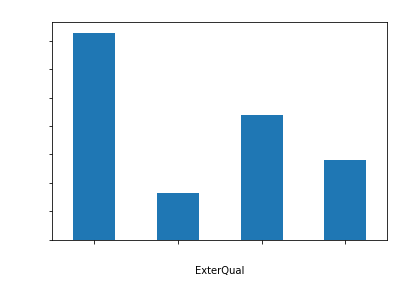

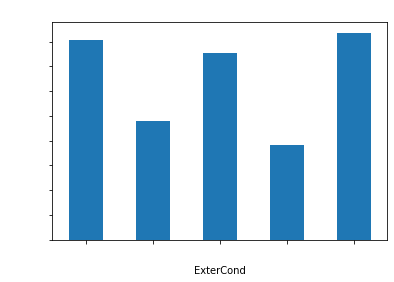

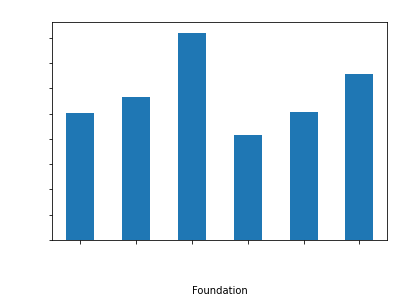

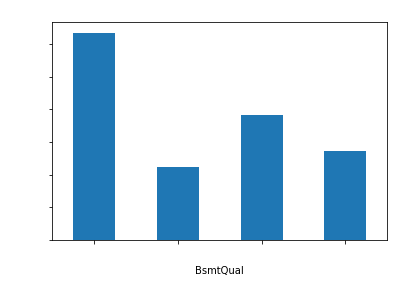

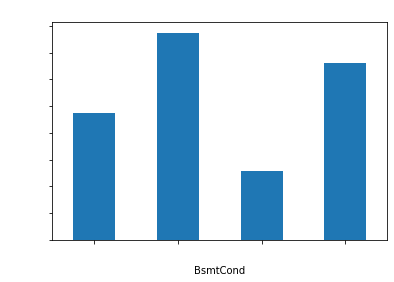

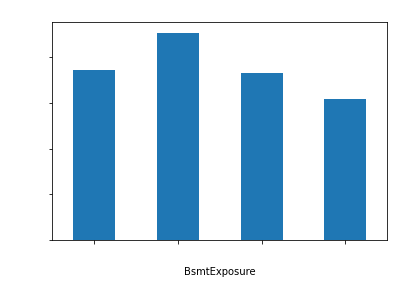

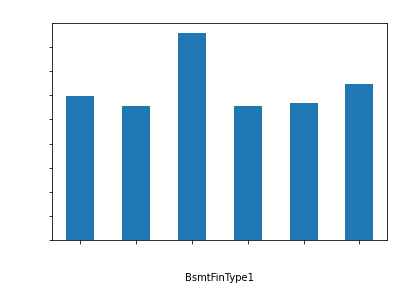

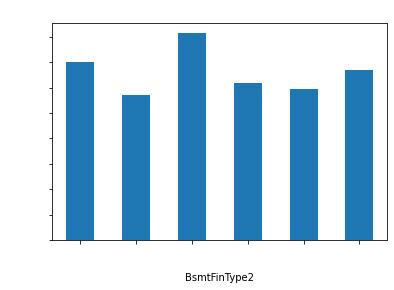

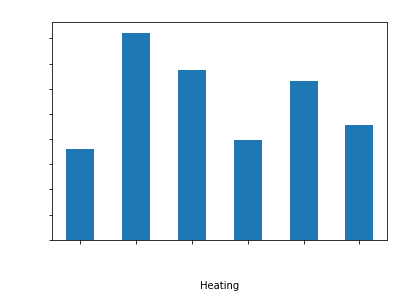

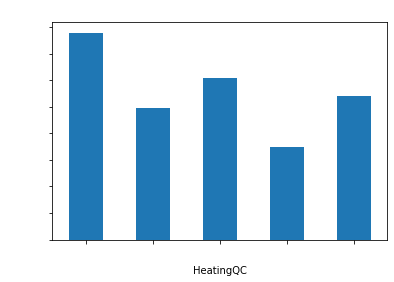

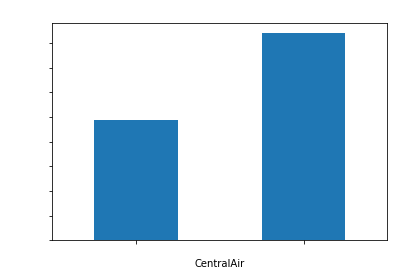

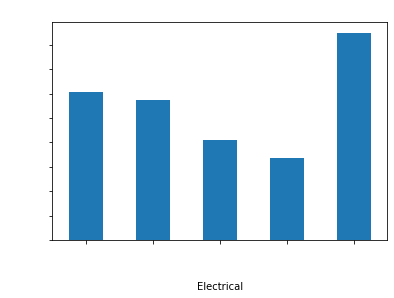

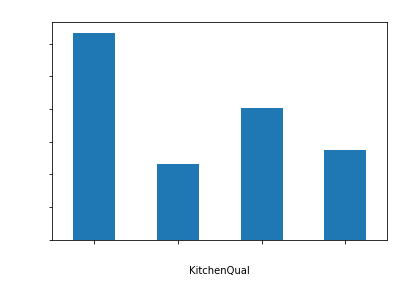

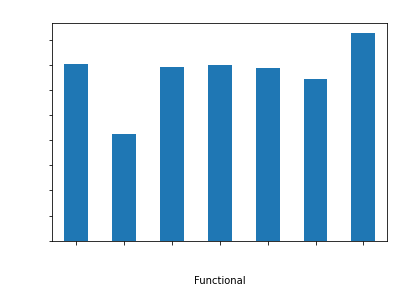

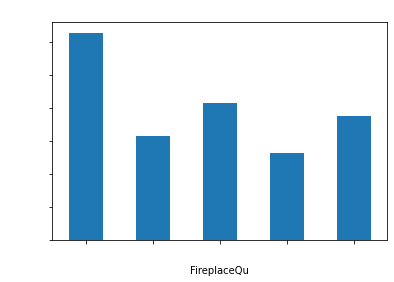

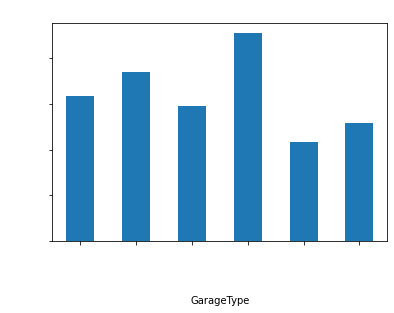

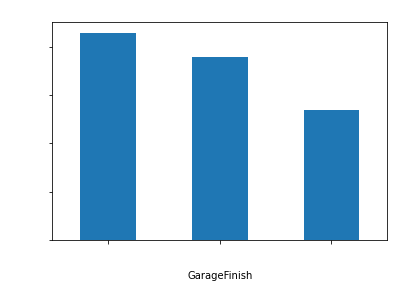

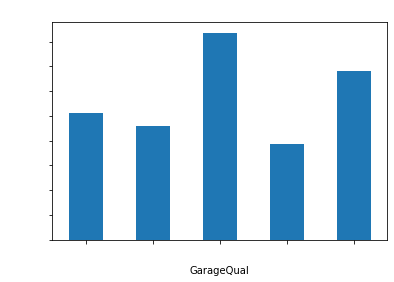

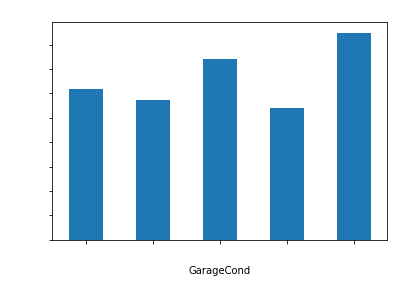

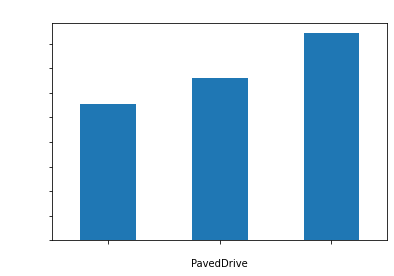

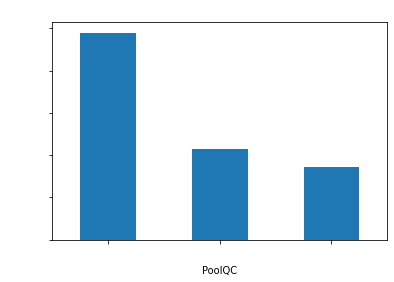

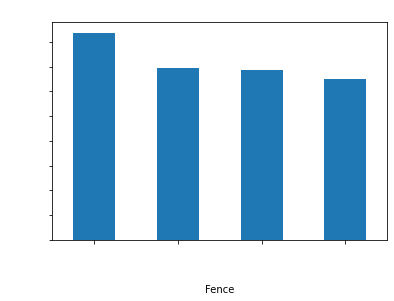

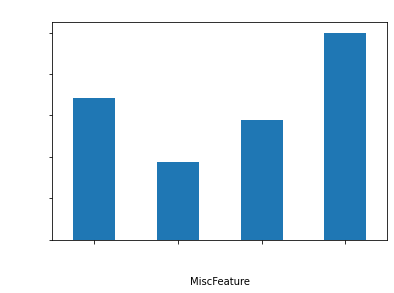

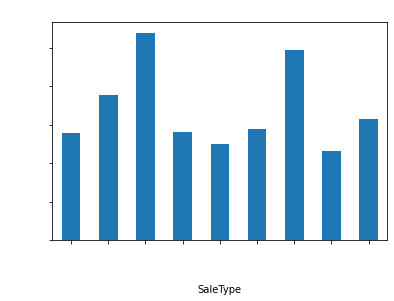

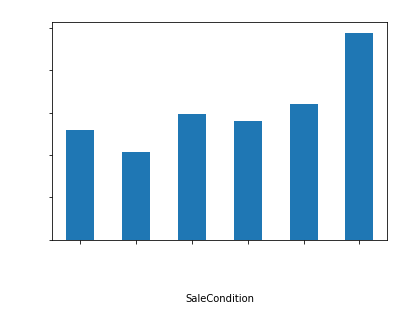

In [74]:
for i in CategoricalFeatures:
    df=data.copy()
    df.groupby(i)['SalePrice'].median().plot.bar()
    plt.title(f'Sale Price vs {i}',color='w')
    plt.xticks(color='w')
    plt.yticks(color='w')
    plt.show()    